In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import os
import struct
import numpy as np




In [3]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

In [4]:

def load_mnist(path, kind='train'):
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte'
                               % kind)
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II',
                                 lbpath.read(8))
        labels = np.fromfile(lbpath,
                             dtype=np.uint8)

    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack('>IIII',
                                               imgpath.read(16))
        images = np.fromfile(imgpath,
                             dtype=np.uint8).reshape((len(labels),28,28))

    return images, labels

In [5]:
X_train, y_train = load_mnist('./data')
                              
X_test, y_test = load_mnist('./data',kind='t10k')
print(X_test.shape,y_test.shape)

(10000, 28, 28) (10000,)


In [6]:
def imgs_show_norm(imgs,row,col):
    fig,ax = plt.subplots(nrows=row,ncols=col,sharex=True,sharey=True)
    ax = ax.flatten()
    for i in range(row*col):
        img = imgs[i]
        min = np.min(img)
#         print('min = ',min)
        img = np.subtract(img,min) # 0->
        max = np.max(img)
#         print('max =',max)
        img = np.divide(img,max)
        
        ax[i].imshow(img,cmap='Greys', interpolation='nearest')
    
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    plt.tight_layout()
    plt.show()

In [7]:
def img_show_norm(img):
    min_ = np.min(img)
#     print('min = ',min_)
    img = np.subtract(img,min_) # 0->
    max_ = np.amax(a = img,keepdims=False)
#     print('max =',max_)
    img = np.divide(img,max_)  # 0->1
#     print(img)
    plt.figure(figsize=(1,1))
    plt.imshow(img,cmap='Greys',interpolation='nearest')

In [8]:
def img_show(img):
    plt.figure(figsize=(1,1))
    plt.imshow(img,cmap='Greys',interpolation='nearest')
    

In [9]:
def imgs_show(imgs,row,col):
    fig,ax = plt.subplots(nrows=row,ncols=col,sharex=True,sharey=True)
    ax = ax.flatten()
    for i in range(row*col):
        img = imgs[i]
        
        ax[i].imshow(img,cmap='Greys', interpolation='nearest')
    
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    plt.tight_layout()
    plt.show()
    
    

In [10]:
def normal_minist(img):
    return ((img / 255.0) -0.5)*2

In [11]:
def expend_HWC(img):
    return np.expand_dims(img,axis=3)


In [12]:
def to_CHW(img):
    return np.transpose(img,(0,3,1,2))
def to_HWC(img):
    return np.transpose(img,(0,2,3,1))

In [13]:
#只能运行一次
X_train_nor = expend_HWC(X_train)
X_train_nor = normal_minist(X_train_nor)
X_train_nor = to_CHW(X_train_nor)
print(X_train_nor.shape)

X_test_nor = expend_HWC(X_test)
X_test_nor = normal_minist(X_test_nor)
X_test_nor = to_CHW(X_test_nor)
print(X_test_nor.shape)




(60000, 1, 28, 28)
(10000, 1, 28, 28)


In [14]:
eval_index = 0
classes = 10

In [15]:
test_nagivate_lable = y_test[y_test != eval_index]
test_postitive = X_test_nor[y_test == eval_index]
test_nagivate = X_test_nor[y_test != eval_index]
# print(test_postitive.shape)
# print(test_nagivate.shape)


train_positive = X_train_nor[y_train == eval_index][[0,55,1111,1009,327,128,5000,469,2000,3001]]
label_positive = y_train[y_train == eval_index][[0,55,1111,1009,327,128,5000,469,2000,3001]]
print(label_positive)
# imgs_show(train_positive,2,5)
# train_nagivate = np.concatenate((train_1 , train_2 ,train_3 , train_4 ,train_5 ,
#                                  train_6 , train_7 ,train_8 ,train_9)) 
train_nagivate = X_train_nor[y_train != eval_index]
label_nagivate = y_train[y_train != eval_index]




[0 0 0 0 0 0 0 0 0 0]


(54077, 1, 28, 28)
[4 9 2 2 2 7 1 8 6 4 1 6 3 4 5 9 1 3 3 8 5 4 7 7 4]


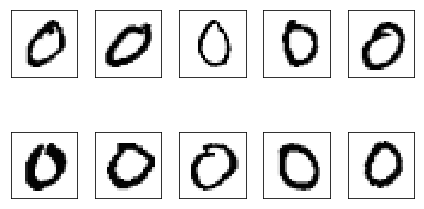

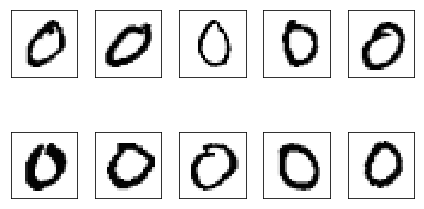

In [16]:

print(train_nagivate.shape)
print(label_nagivate[100:125])

# imgs_show(np.squeeze(train_nagivate[100:125]) ,5,5)
imgs_show(np.squeeze(train_positive) ,2,5)
imgs_show_norm(np.squeeze(train_positive) ,2,5)
# imgs_show_norm(np.squeeze(train_nagivate[100:125]) ,5,5)

In [17]:
shuf_index = np.random.permutation(len(train_nagivate))

In [18]:
def num_flat_features(x):
    size = x.size()[1:]
    num_features =1
        
    for s in size:
        num_features *= s
    return num_features
        

In [27]:
p = np.random.uniform(0.3,0.6)
q = np.random.randint(0,2)
nn_index = [-1,1]
print(nn_index[q] * p)
print(p)


-0.4970747751300183
0.4970747751300183


In [180]:
class AutoCodeNet(nn.Module):
    def __init__(self):
        super(AutoCodeNet,self).__init__()
        self.conv1 = nn.Conv2d(1,8,kernel_size=3,stride=2,padding=1)
#         self.pool1 = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(8,16,kernel_size=3,stride=2,padding=1)
#         self.pool2 = nn.MaxPool2d(2,2)
        self.conv3 = nn.Conv2d(16,24,kernel_size=3,stride=2,padding=1)
#         self.pool3 = nn.MaxPool2d(2,2,padding=1)

        self.fc1 = nn.Linear(24*4*4,100)
        self.fc2 = nn.Linear(100,10)
      
            
        
        self.up1 = nn.Upsample(scale_factor = 2,mode='nearest')
#         F.interpolate()
        self.conv_d1 = nn.Conv2d(24,16,kernel_size=3,stride=1,padding=1)
        self.up2 = nn.Upsample(scale_factor = 2)
        self.conv_d2 = nn.Conv2d(16,8,kernel_size=3,stride=1)
        self.up3 = nn.Upsample(scale_factor = 2)
        self.conv_d3 = nn.Conv2d(8,8,kernel_size=3,stride=1,padding=1)
        
        self.conv_d4 = nn.Conv2d(8,1,kernel_size=3,stride=1,padding=1)
        
        self.features={}
        
    def decodeForward(self,x):
        #decode
        x = F.leaky_relu(self.conv1(x))
        self.features['relu1'] = x
        
        x = F.leaky_relu(self.conv2(x))
        self.features['relu2'] = x
        
        x = F.leaky_relu(self.conv3(x))
        self.features['relu3'] = x
        
        return x
    
    def encodeforward(self,x):
        
        x_g = self.up1(x)
        self.features['up1'] = x_g
        x_g = F.leaky_relu(self.conv_d1(x_g))
        self.features['relu_d1'] = x_g
        
        x_g = self.up2(x_g)
        self.features['up2'] = x_g
        x_g = F.leaky_relu(self.conv_d2(x_g))
        self.features['relu_d2'] = x_g
        
        x_g = self.up3(x_g)
        self.features['up3'] = x_g
        x_g = F.leaky_relu(self.conv_d3(x_g))
        self.features['relu_d3'] =x_g
        
        x_g = self.conv_d4(x_g)
        self.features['conv_d4'] = x_g
        
        x_g = F.tanh(x_g)
        self.features['tanh'] = x_g
        return  x_g
    
    def class_forward(self,x):
        x_c = x.view(-1,num_flat_features(x))
        x_c = F.leaky_relu(self.fc1(x_c))
        x_c = F.dropout(x_c, training=self.training)
        x_c = self.fc2(x_c)
        x_c = F.log_softmax(x_c,dim=1)
        return x_c
        
        
    def forward(self,x,label):
        assert len(x) % 3 == 0
        
        #decode
        x = self.decodeForward(x)
        print('x.size(): ',x.size())
        
        label = torch.from_numpy(label)
        #sample
        g = torch.zeros_like(x[label == 0]) #require_grad = False
        print('g.size: ',g.size())
        p = np.random.uniform(0.3,0.6)
        q = np.random.randint(0,2)
        for i in range(10):
            g[i] = x[label == 0][i] + nn_index[q] * p * (x[label == i][0] - x[label == i][1])
            
            
            
        
        #class
        x_c = self.class_forward(x)
        
        #encode
        with torch.no_grad():
            x_g = self.encodeforward(g)
        
        x_g_c = self.decodeForward(x_g)
        x_g_c = self.class_forward(x_g_c)
        print("x_c : shape = ",x_c.size())
        print("x_g_c : shape = ",x_g_c.size())
        print("self.conv_d1 grad:",self.conv_d1.weight.grad)
        print("self.conv_1 grad:",self.conv1.weight.grad)
        
        return x_g ,x_c,x_g_c
        
        
        
        
        
        
        

In [183]:
net_auto = AutoCodeNet()
# print(net_auto)
inp1 = Variable(torch.randn((30,1,28,28)))

out1,classs,_ = net_auto(inp1,np.array([0,0,0,0,0,0,0,0,0,0,1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8,9,9,3,3]))
print(net_auto.conv1.weight.data.size())
classs = torch.sum(classs)
classs.backward()
print("net_auto.conv_d1 grad:",net_auto.conv_d1.weight.grad)
print("net_auto.conv_1 grad:",net_auto.conv1.weight.grad)
# print(out1.size())
# print(classs.size())

# print("decode:")
# print(net_auto.features['relu1'].size())
# # print(net_auto.features['pool1'].size())
# print(net_auto.features['relu2'].size())
# # print(net_auto.features['pool2'].size())
# print(net_auto.features['relu3'].size())
# # print(net_auto.features['pool3'].size())

# print("encode:")
# print(net_auto.features['up1'].size())
# print(net_auto.features['relu_d1'].size())
# print(net_auto.features['up2'].size())
# print(net_auto.features['relu_d2'].size())
# print(net_auto.features['up3'].size())
# print(net_auto.features['relu_d3'].size())
# print(net_auto.features['conv_d4'].size())
# print(net_auto.features['tanh'].size())



x.size():  torch.Size([30, 24, 4, 4])
g.size:  torch.Size([10, 24, 4, 4])
x_c : shape =  torch.Size([30, 10])
x_g_c : shape =  torch.Size([10, 10])
self.conv_d1 grad: None
self.conv_1 grad: None
torch.Size([8, 1, 3, 3])
net_auto.conv_d1 grad: None
net_auto.conv_1 grad: tensor([[[[-0.0115, -0.0164,  0.0283],
          [-0.0089, -0.0382, -0.0123],
          [ 0.0217, -0.0013, -0.0208]]],


        [[[-0.0160,  0.0138,  0.0317],
          [ 0.0286,  0.0061,  0.0107],
          [-0.0030,  0.0009,  0.0201]]],


        [[[-0.0092,  0.0061, -0.0113],
          [ 0.0099, -0.0214, -0.0056],
          [ 0.0339, -0.0203,  0.0146]]],


        [[[-0.0076, -0.0106,  0.0099],
          [ 0.0135,  0.0167,  0.0016],
          [-0.0157, -0.0155,  0.0154]]],


        [[[ 0.0083,  0.0166, -0.0304],
          [-0.0095, -0.0292, -0.0027],
          [ 0.0297,  0.0095, -0.0048]]],


        [[[-0.0023, -0.0106,  0.0141],
          [-0.0067,  0.0185, -0.0167],
          [ 0.0102,  0.0069, -0.0060]]],


    

In [30]:
def getnext(train_x,train_y,batch_size):
    batchs = len(train_y) // batch_size
    print(len(train_y),batchs)

    for i in range(batchs):
        x = train_x[batch_size * i : batch_size * (i+1)]
        y = train_y[batch_size * i : batch_size * (i+1)]
        yield x,y
        

In [31]:
def get_nagivate_next(train_positive,train_nagivate):
    batch_size = len(train_positive) 
    batchs = len(train_nagivate) // batch_size
    print(len(train_nagivate),batchs)
    
    for i in range(batchs):
        x = np.concatenate((train_positive,train_nagivate[batch_size * i : batch_size * (i+1)]))
        y = np.concatenate((np.zeros(batch_size),np.ones(batch_size)))
        shuf_index = np.random.permutation(len(y))
        x = x[shuf_index]
        y = y[shuf_index]
        
        
        yield x ,y 
        

In [32]:
def get_nagivate_batch_next(train_positive,train_nagivate,batch_size):
#     batch_size = len(train_positive) 
    batchs = len(train_nagivate) // batch_size
    print(len(train_nagivate),batchs)
    
    for i in range(batchs):
        x = np.concatenate((train_positive,train_nagivate[batch_size * i : batch_size * (i+1)]))
        y = np.concatenate((np.zeros(len(train_positive)),np.ones(len(train_nagivate))))
        shuf_index = np.random.permutation(len(x))
        x = x[shuf_index]
        y = y[shuf_index]
        
        
        yield x ,y 

In [33]:
def get_next_posi_nag(train_positive,train_nagivate,label_positive, label_nagivate ,batch_size):
#     batch_size = len(train_positive) 
    batchs = len(train_nagivate) // batch_size
    print(len(train_nagivate),batchs)
    
    for i in range(batchs):
        x = np.concatenate((train_positive,train_nagivate[batch_size * i : batch_size * (i+1)]))
        y = np.concatenate((label_positive,label_nagivate[batch_size * i : batch_size * (i+1)]))
        shuf_index = np.random.permutation(len(x))
        x = x[shuf_index]
        y = y[shuf_index]
        
        
        yield x ,y 

In [201]:
def get_next_pn_label(train_positive,train_nagivate,label_positive, label_nagivate):

    class_index_num =[]
    for i in range(1,10):
        class_index_num.append(len(train_nagivate[label_nagivate == i]))
    class_index_num = np.array(class_index_num)
    print('class_index_num = ',class_index_num)
    min_index_num = np.min(class_index_num)
    print('min_index_num = ',min_index_num)
    max_index_num = np.max(class_index_num)
    print('max_index_num = ',max_index_num)
    max_index_class = np.argmax(class_index_num) + 1
    print('max_index_class = ',max_index_class)
    batch_size = 2
    batchs = min_index_num // batch_size
    print('batchs = ',batchs)
    
    
    
    x = train_positive
    y = label_positive
    
    for i in range(batchs):
        for class_index in range(1,10):
            
            # batch_index < class len
            if batch_size * (i+1) <= class_index_num[class_index - 1] :
                
                x = np.concatenate( (x,train_nagivate[label_nagivate == class_index][batch_size * i : batch_size * (i+1)]))
                y = np.concatenate((y,label_nagivate[label_nagivate == class_index][batch_size * i : batch_size * (i+1)]))
        
        if len(x) < (3 * len(train_positive)) :
            x = np.concatenate((x,train_nagivate[label_nagivate == max_index_class][batch_size * (i+1) : batch_size * (i+2)]))
            y = np.concatenate((y,label_nagivate[label_nagivate == max_index_class][batch_size * (i+1) : batch_size * (i+2)]))

        shuf_index = np.random.permutation(len(x))
        x = x[shuf_index]
        y = y[shuf_index]
        
        
        yield x ,y 
                            
    
#     train_1 = train_nagivate[y_train == 1]
#     print("train_1.shape = ",train_1.shape)

#     train_2 = train_nagivate[y_train == 2]
#     print("train_2.shape = ",train_2.shape)

#     train_3 = train_nagivate[y_train == 3]
#     print("train_3.shape = ",train_3.shape)

#     train_4 = train_nagivate[y_train == 4]
#     print("train_0.shape = ",train_4.shape)


#     train_5 = train_nagivate[y_train == 5]
#     print("train_0.shape = ",train_5.shape)


#     train_6 = train_nagivate[y_train == 6]
#     print("train_6.shape = ",train_6.shape)

#     train_7 = train_nagivate[y_train == 7]
#     print("train_7.shape = ",train_7.shape)


#     train_8 = train_nagivate[y_train == 8]
#     print("train_8.shape = ",train_8.shape)


#     train_9 = train_nagivate[y_train == 9]
#     print("train_9.shape = ",train_9.shape)
                               
# train_0.shape =  (5923, 1, 28, 28)
# train_1.shape =  (6742, 1, 28, 28)
# train_2.shape =  (5958, 1, 28, 28)
# train_3.shape =  (6131, 1, 28, 28)
# train_0.shape =  (5842, 1, 28, 28)
# train_0.shape =  (5421, 1, 28, 28)
# train_6.shape =  (5918, 1, 28, 28)
# train_7.shape =  (6265, 1, 28, 28)
# train_8.shape =  (5851, 1, 28, 28)
# train_9.shape =  (5949, 1, 28, 28)

class_index_num =  [22 11 16 16  9 15 15 12 14]
min_index_num =  9
max_index_num =  22
max_index_class =  1
batchs =  4
(30, 1, 28, 28)
[0 2 6 3 9 8 0 0 1 7 0 4 0 2 0 0 0 0 8 3 5 0 4 5 1 1 1 9 6 7]


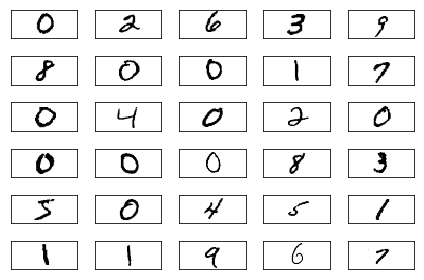

(48, 1, 28, 28)
[6 0 9 1 2 0 0 2 7 0 9 0 1 4 5 6 0 5 4 0 0 8 2 7 4 8 0 1 9 5 9 0 3 6 7 3 4
 3 8 1 2 5 8 3 1 1 6 7]


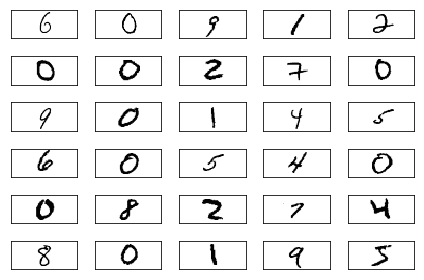

(66, 1, 28, 28)
[6 5 6 3 7 9 4 6 9 6 2 1 2 9 5 1 2 0 2 1 0 1 8 4 0 2 1 4 0 8 4 3 9 7 8 1 7
 5 9 5 0 0 0 8 4 7 7 4 3 2 8 5 8 0 1 6 7 1 6 0 9 5 3 3 3 0]


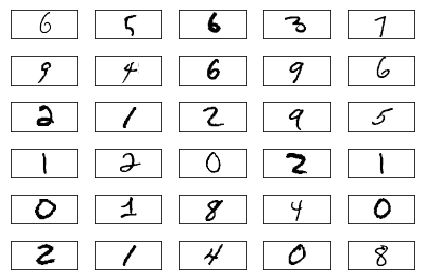

(84, 1, 28, 28)
[2 3 7 1 5 5 6 6 7 9 5 4 3 0 7 8 9 0 8 2 4 3 2 2 1 0 8 0 4 2 2 9 5 2 4 7 0
 0 8 8 9 2 3 1 4 8 5 1 6 5 3 1 7 9 9 0 9 9 6 6 6 1 7 5 8 8 1 1 6 6 4 0 3 0
 4 1 3 3 7 1 7 0 4 5]


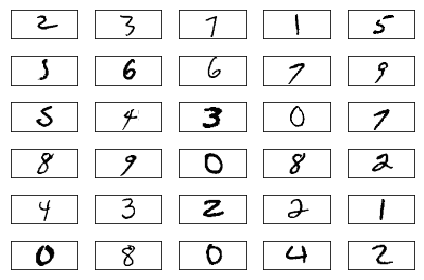

In [202]:
datas = get_next_pn_label(train_positive,train_nagivate[:130],label_positive,label_nagivate[:130])
for x,y in datas:
    print(x.shape)
    
    print(y)
    imgs_show(np.squeeze( x),6,5)


In [35]:
net_auto = AutoCodeNet()
net_auto.load_state_dict(torch.load('model_autoEncode_para.pt'))

In [36]:

# net_auto = torch.load('model_autoEncode5.pkl')
use_cuda = torch.cuda.is_available()
torch.manual_seed(666)
device = torch.device("cuda" if use_cuda else "cpu")
net_auto.to(device)
net_auto.float()


criterion = nn.MSELoss()
optimizer = optim.SGD(net_auto.parameters(),lr=0.0001,momentum=0.9,weight_decay=5e-4)


In [38]:
#X_train_nor

net_auto.train()
for epoch in range(1):
    datas = get_next_posi_nag(train_positive,train_nagivate,label_positive,label_nagivate, 10)
    trainloss_g = 0
    trainloss_c = 0
    
    for x,y in datas:
        inputs ,lables = Variable(torch.from_numpy(x).float()).to(device),Variable(torch.from_numpy(y).long()).to(device)
#         print(inputs.size())
#         print(lables[0])
        optimizer.zero_grad()
        output,classify = net_auto(inputs)
#         print(output.size())
#         print(classify.size())
        loss_g = criterion(output,inputs) 
        loss_c = F.nll_loss(classify,lables)
        loss = loss_g + loss_c
        trainloss_g += loss_g.item()
        trainloss_c += loss_c.item()
        loss.backward()
        optimizer.step()
        
    print('%d  gloss: %.3f, class loss:%.3f' % (epoch ,  trainloss_g,trainloss_c))
torch.save(net_auto.state_dict(),'model_autoEncode_para.pt')

54077 5407
0  gloss: 70.425, class loss:53.530


In [70]:
# net_auto = torch.load('model_autoEncode5.pkl')
net_auto.to(device)
net_auto.eval()
test_loss = 0
correct = 0

test_datas = getnext(test_postitive,np.zeros(len(test_postitive)),4)
for x ,y in test_datas:
        inputs, labels = Variable(torch.from_numpy(x).float()).cuda(), Variable(torch.from_numpy(y).long()).cuda()
        _,classify = net_auto(inputs)
        test_loss += F.nll_loss(classify, labels, size_average=False).item() # sum up batch loss
        pred = classify.max(1,keepdim=True)[1]
        print(pred)
        correct += pred.eq(labels.view_as(pred)).sum().item()
#         print(correct)
print(correct)
print(correct * 1.0 / len(test_postitive))
print(test_loss)




    
    

980 245
tensor([[0],
        [0],
        [0],
        [0]], device='cuda:0')
tensor([[0],
        [0],
        [0],
        [0]], device='cuda:0')
tensor([[0],
        [0],
        [0],
        [0]], device='cuda:0')
tensor([[0],
        [0],
        [0],
        [0]], device='cuda:0')
tensor([[0],
        [0],
        [0],
        [0]], device='cuda:0')
tensor([[0],
        [0],
        [0],
        [5]], device='cuda:0')
tensor([[0],
        [0],
        [0],
        [6]], device='cuda:0')
tensor([[0],
        [0],
        [0],
        [0]], device='cuda:0')
tensor([[0],
        [0],
        [0],
        [0]], device='cuda:0')
tensor([[0],
        [8],
        [0],
        [0]], device='cuda:0')
tensor([[4],
        [0],
        [0],
        [0]], device='cuda:0')
tensor([[0],
        [6],
        [0],
        [0]], device='cuda:0')
tensor([[0],
        [0],
        [0],
        [0]], device='cuda:0')
tensor([[6],
        [0],
        [0],
        [0]], device='cuda:0')
tensor([[9],

tensor([[2],
        [2],
        [0],
        [0]], device='cuda:0')
tensor([[0],
        [0],
        [0],
        [6]], device='cuda:0')
tensor([[0],
        [0],
        [0],
        [0]], device='cuda:0')
tensor([[0],
        [0],
        [0],
        [0]], device='cuda:0')
tensor([[0],
        [0],
        [0],
        [6]], device='cuda:0')
tensor([[0],
        [6],
        [0],
        [0]], device='cuda:0')
tensor([[0],
        [6],
        [0],
        [9]], device='cuda:0')
tensor([[2],
        [2],
        [0],
        [0]], device='cuda:0')
tensor([[2],
        [2],
        [8],
        [4]], device='cuda:0')
tensor([[0],
        [0],
        [0],
        [0]], device='cuda:0')
tensor([[0],
        [0],
        [2],
        [0]], device='cuda:0')
tensor([[0],
        [0],
        [0],
        [0]], device='cuda:0')
tensor([[0],
        [0],
        [0],
        [0]], device='cuda:0')
tensor([[0],
        [0],
        [0],
        [0]], device='cuda:0')
tensor([[0],
       

In [69]:
net_auto = AutoCodeNet()
net_auto.load_state_dict(torch.load('model_autoEncode_para.pt'))
net_auto.to(device)
net_auto.eval()

test_loss = 0
correct = 0
test_datas = getnext(test_nagivate,test_nagivate_lable,4)
for x ,y in test_datas:
        inputs, labels = Variable(torch.from_numpy(x).float()).cuda(), Variable(torch.from_numpy(y).long()).cuda()
        _,classify = net_auto(inputs)
        test_loss += F.nll_loss(classify, labels, size_average=False).item() # sum up batch loss
        pred = classify.max(1,keepdim=True)[1]
#         print(pred)
        correct += pred.eq(labels.view_as(pred)).sum().item()
#         print(correct)
print(correct)
print(correct * 1.0 / len(test_nagivate))
print(test_loss)

9020 2255
8942
0.991352549889
230.203848362


negavite middle sum: tensor(-18.7496, device='cuda:0', grad_fn=<SumBackward0>)
torch.Size([1, 1, 28, 28])


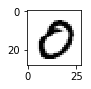

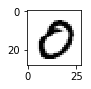

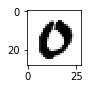

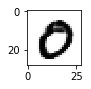

In [71]:
net_auto = AutoCodeNet()
net_auto.load_state_dict(torch.load('model_autoEncode_para.pt'))
net_auto.cuda()
net_auto.eval()


inputs1,inputs2,inputs3 = Variable(torch.from_numpy( train_positive[4:5]).float()).cuda(), \
    Variable(torch.from_numpy( X_train_nor[y_train==9][203:204]).float()).cuda(),\
    Variable(torch.from_numpy( X_train_nor[y_train==9][511:512]).float()).cuda(),
#     outputs = net_auto(inputs)
#     img_show(np.squeeze(outputs.data))
    
middle1 = net_auto.decodeForward(inputs1)
middle2 = net_auto.decodeForward(inputs2)
middle3 = net_auto.decodeForward(inputs3)
# print(middle1.size())
# print(middle1.data[0][2])
# print(middle2.data[0][0])
# imgs_show(np.squeeze(middle1.data),4,6)
# imgs_show(np.squeeze(middle2.data),4,6)
# imgs_show(np.squeeze(middle3.data),4,6)
middle_divide = middle2[:,:,:,:] - middle3[:,:,:,:]
print('negavite middle sum:',torch.sum(middle_divide))
    
middle1[:,:,:,:] = middle1[:,:,:,:]  - 0.4 * middle_divide
    
# print(middle1.data[:,2,:,:])
# print(middle2.data[:,0,:,:])

out = net_auto.encodeforward(middle1)
print(out.size())
# print('out.data = ',out.data)

img_show(np.squeeze(inputs2.data))
img_show(np.squeeze(inputs1.data))
img_show(np.squeeze(inputs3.data))

img_show(np.squeeze(out.data))
# img_show_norm(np.squeeze(out.cpu().data.numpy()))

